In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
import pickle
from pylab import rcParams

rs = 810

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/신용카드/creditcard.csv", delimiter=',', dtype=np.float32)

print(df.shape, '\n')
print(df.head())

(284807, 31) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18      

# 데이터분할 및 스케일링

In [ ]:
# 대부분의 데이터가 이미 스케일링 되어 있음. 남은 열 'Amount' 와 'Time' 을 스케일링 해야함.
# RobustScaler는 이상치에 덜 민감해서 사용하기로 함.
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

In [ ]:
# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# df.head()

In [ ]:
new_df = df.copy()
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [ ]:
# # Turn the values into an array for feeding the classification algorithms.
# x_train = x_train.values
# x_test = x_test.values
# y_train = y_train.values
# y_test = y_test.values

# 무작위 언더샘플링

In [ ]:
# 데이터의 일부를 제거하여 더 균형 잡힌 데이터셋을 만듦.
# 모델이 과적합되는 것을 방지함.
# 단계
# 1. 클래스의 불균형 정도 확인:
# 클래스 열에서 'value_counts()' 사용하여 각 레이블의 개수를 확인
# 2. 사기 거래 인스턴스 수 확인:
# 사기 거래 (Fraud = '1') 인스턴스의 개수를 확인한 후, 정상 거래 인스턴스를 동일한 개수로 맞춤 (50/50 비율).
# 492건의 사기 거래와 492건의 정상 거래를 포함함.
# 3. 데이터 셔플링:
# 데이터프레임의 하위 샘플을 클래스 비율이 50/50 상태로 만들고, 데이터를 셔플링하여 매번 스크립트를 실행할 때 모델의 정확도가 유지되는지 확인함.
# 주의
# '무작위 언더샘플링'의 문제는 많은 양의 정보 손실 위험이 있음. 이는 284,315개의 비사기 거래 중 492개의 비사기 거래만을 사용하게 되어 분류 모델의 정확도가 높지 않을 수 있음.

colors = ["#0101DF", "#DF0101"]

In [ ]:
under_df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = under_df.loc[df['Class'] == 1]
non_fraud_df = under_df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
random_under_df = normal_distributed_df.sample(frac=1, random_state=rs)

random_under_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
225312,0.223618,0.768996,-1.345911,-1.076192,1.942128,0.018346,1.237840,-0.156497,-0.538158,-0.188735,-0.675936,-0.067739,-0.388991,0.585594,-1.288214,0.031702,-0.989043,0.372654,0.745007,-0.167419,0.130961,0.375863,-0.441035,-0.631969,0.310543,0.662996,-0.218154,-0.050981,0.0,-0.296793
31002,-5.685013,5.776516,-7.064977,5.902716,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,3.676703,-7.642983,1.689865,-8.299660,0.646996,-6.792795,-12.075933,-4.882180,2.626625,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1.0,1.253406
129532,-0.615536,0.984640,1.538968,0.914982,0.883848,0.037240,1.369353,-0.495953,-0.971441,0.588579,1.805374,0.650242,0.159223,0.196959,0.629869,-0.828863,-0.165171,-0.449791,0.955724,0.114010,-0.247316,-0.413198,-0.169577,-0.010893,-0.208119,-0.594318,-0.448116,-0.327395,0.0,0.293020
3881,-1.698252,-0.334381,2.947017,0.229637,0.406429,1.990538,-0.590167,0.868196,0.664532,-1.095025,-0.167014,0.625834,0.068620,-0.745016,0.728693,-0.906589,0.671097,-1.513252,-2.417456,-0.157311,0.383193,1.309485,-0.146319,-0.938411,0.205505,-0.157136,0.016102,0.186879,0.0,0.643052
271675,-0.525801,0.915679,0.989596,-0.734854,1.102415,-0.140427,1.242749,-0.334555,-0.272346,-0.453824,-1.743267,-0.840354,-0.537098,0.034424,0.302571,-0.162276,-0.498114,-0.350542,0.998487,0.035481,-0.388957,-0.997330,-0.457105,-1.069769,0.493489,0.432088,-0.331785,-0.187730,0.0,-0.244673


Distribution of the Classes in the subsample dataset
Class
0.0    0.5
1.0    0.5
Name: count, dtype: float64


<ipython-input-12-4b6d64097fe2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=random_under_df, palette=colors)


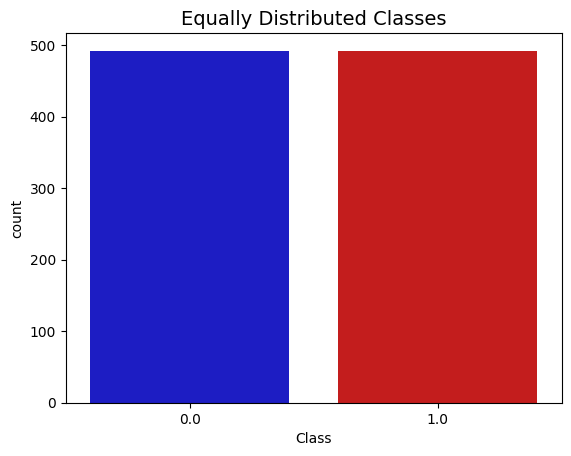

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(random_under_df['Class'].value_counts()/len(random_under_df))

sns.countplot(x='Class', data=random_under_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# 이상거래와 정상거래 비율이 같아짐

In [ ]:
# New_df is from the random undersample data (fewer instances)
under_x = random_under_df.drop(['Class'], axis=1)
under_y = random_under_df['Class']

In [ ]:
under_x_train, under_x_test, under_y_train, under_y_test = train_test_split(under_x, under_y, test_size=0.2, random_state=rs)

In [ ]:
under_x_train, under_x_val, under_y_train, under_y_val = train_test_split(under_x_train, under_y_train, test_size=0.2, random_state=rs)

In [ ]:
print(under_x_train.shape, under_x_val.shape, under_x_test.shape)

(629, 29) (158, 29) (197, 29)


# 언더샘플링

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LightGBM Classifier": LGBMClassifier(),
    "XGBoost Classifier": XGBClassifier()}

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
LGBM_model = LGBMClassifier(n_jobs=-1,verbosity=-1, boost_from_average=False,
                            random_state=rs)
# 극도의 클래스 불균형이 있는 경우 True로 지정하면 recall을 매우 저하시킴

LGBM_model.fit(under_x_train, under_y_train)

LGBMClassifier(boost_from_average=False, n_jobs=-1, random_state=810,
               verbosity=-1)

In [ ]:
# !pip install scikit-learn==1.5.2

In [ ]:
xgb_model = XGBClassifier(random_state=rs)

xgb_model.fit(under_x_train, under_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=810, ...)

In [ ]:
for key, classifier in classifiers.items():
    classifier.fit(under_x_train, under_y_train)
    training_score = cross_val_score(classifier, under_x_train, under_y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LGBMClassifier Has a training score of 94.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 94.0 % accuracy score


In [217]:
lgbm_params = {'num_leaves': [3, 5, 7],
               'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05, 1],
    'n_estimators': [50,100, 150],
}
grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5, error_score='raise')
grid_lgbm.fit(under_x_train, under_y_train)
print(grid_lgbm.best_params_)
lgbm_param = grid_lgbm.best_estimator_

xgb_params = {'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05, 1],
    'n_estimators': [50,100, 150],
}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
grid_xgb.fit(under_x_train, under_y_train)
print(grid_xgb.best_params_)
xgb_param = grid_xgb.best_estimator_


{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 7}
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}


In [ ]:
lgbm_param_score = cross_val_score(lgbm_param, under_x_train, under_y_train, cv=5)
print('LGBM Classifier Cross Validation Score: ', round(lgbm_param_score.mean() * 100, 2).astype(str) + '%')

xgb_param_score = cross_val_score(xgb_param, under_x_train, under_y_train, cv=5)
print('XGB Classifier Cross Validation Score: ', round(xgb_param_score.mean() * 100, 2).astype(str) + '%')

LGBM Classifier Cross Validation Score:  95.39%
XGB Classifier Cross Validation Score:  94.6%


In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = new_df.drop('Class', axis=1)
y = new_df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [222]:
# We will undersample during cross validating
undersample_X = new_df.drop(['Class'], axis=1)
undersample_y = new_df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=rs)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

xgb_undersample_accuracy = []
xgb_undersample_precision = []
xgb_undersample_recall = []
xgb_undersample_f1 = []
xgb_undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), xgb_param) # SMOTE happens during Cross Validation not before..
    xgb_undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = xgb_undersample_model.predict(undersample_Xtrain[test])

    xgb_undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    xgb_undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    xgb_undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    xgb_undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    xgb_undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [229564 222692 158098 ... 253853 191384 143511] Test: [265164 170472 172477 ... 106630  26234 105829]
Train: [ 17392  80268  90219 ...   5812 203038 280764] Test: [234240 203492 253206 ... 229931 187061  20567]
Train: [273053 233130 259982 ... 177432 218913 223527] Test: [255210 250671  84440 ... 245168 106549 166396]
Train: [263637  92158 200385 ... 248556 201209 245932] Test: [225030 268697 136835 ... 146509 113413 134232]
Train: [204300 218102 114759 ...  81769 272549 125400] Test: [ 21109 190481 264932 ... 159369 188020  76263]
NearMiss Label Distribution: Counter({0.0: 492, 1.0: 492})


In [ ]:
undersample_X = new_df.drop(['Class'], axis=1)
undersample_y = new_df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=rs)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

lgbm_undersample_accuracy = []
lgbm_undersample_precision = []
lgbm_undersample_recall = []
lgbm_undersample_f1 = []
lgbm_undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), lgbm_param) # SMOTE happens during Cross Validation not before..
    lgbm_undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = lgbm_undersample_model.predict(undersample_Xtrain[test])

    lgbm_undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    lgbm_undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    lgbm_undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    lgbm_undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    lgbm_undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [229564 222692 158098 ... 253853 191384 143511] Test: [265164 170472 172477 ... 106630  26234 105829]
Train: [ 17392  80268  90219 ...   5812 203038 280764] Test: [234240 203492 253206 ... 229931 187061  20567]
Train: [273053 233130 259982 ... 177432 218913 223527] Test: [255210 250671  84440 ... 245168 106549 166396]
Train: [263637  92158 200385 ... 248556 201209 245932] Test: [225030 268697 136835 ... 146509 113413 134232]
Train: [204300 218102 114759 ...  81769 272549 125400] Test: [ 21109 190481 264932 ... 159369 188020  76263]
NearMiss Label Distribution: Counter({0.0: 492, 1.0: 492})


In [229]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(12, 24), sharey=True)

    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("LGBM Classifier Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("XGB Classifier Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

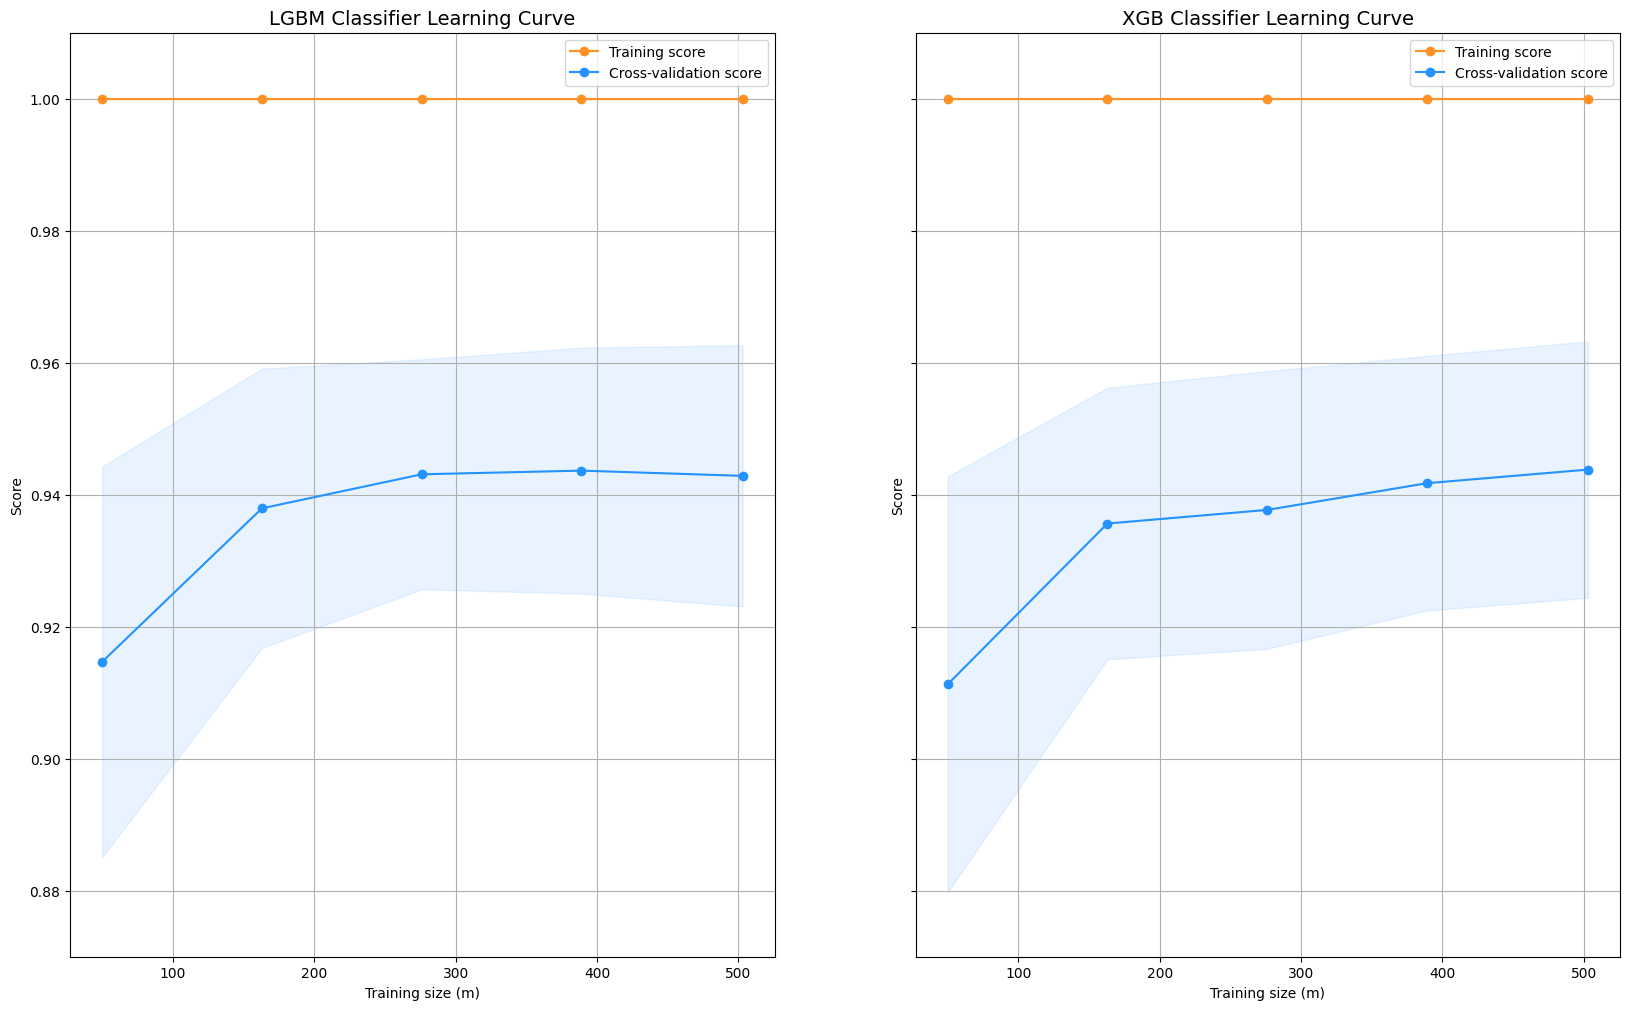

In [214]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=rs)
plot_learning_curve(lgbm_param, xgb_param, under_x_train, under_y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
lgb_param_pred = cross_val_predict(lgbm_param, under_x_train, under_y_train, cv=5)
xgb_param_pred = cross_val_predict(xgb_param, under_x_train, under_y_train, cv=5)

print('LightGBM: ', roc_auc_score(under_y_train, lgb_param_pred))
print('Xgboost: ', roc_auc_score(under_y_train, xgb_param_pred))

LightGBM:  0.9542724239053493
Xgboost:  0.9464354333097381


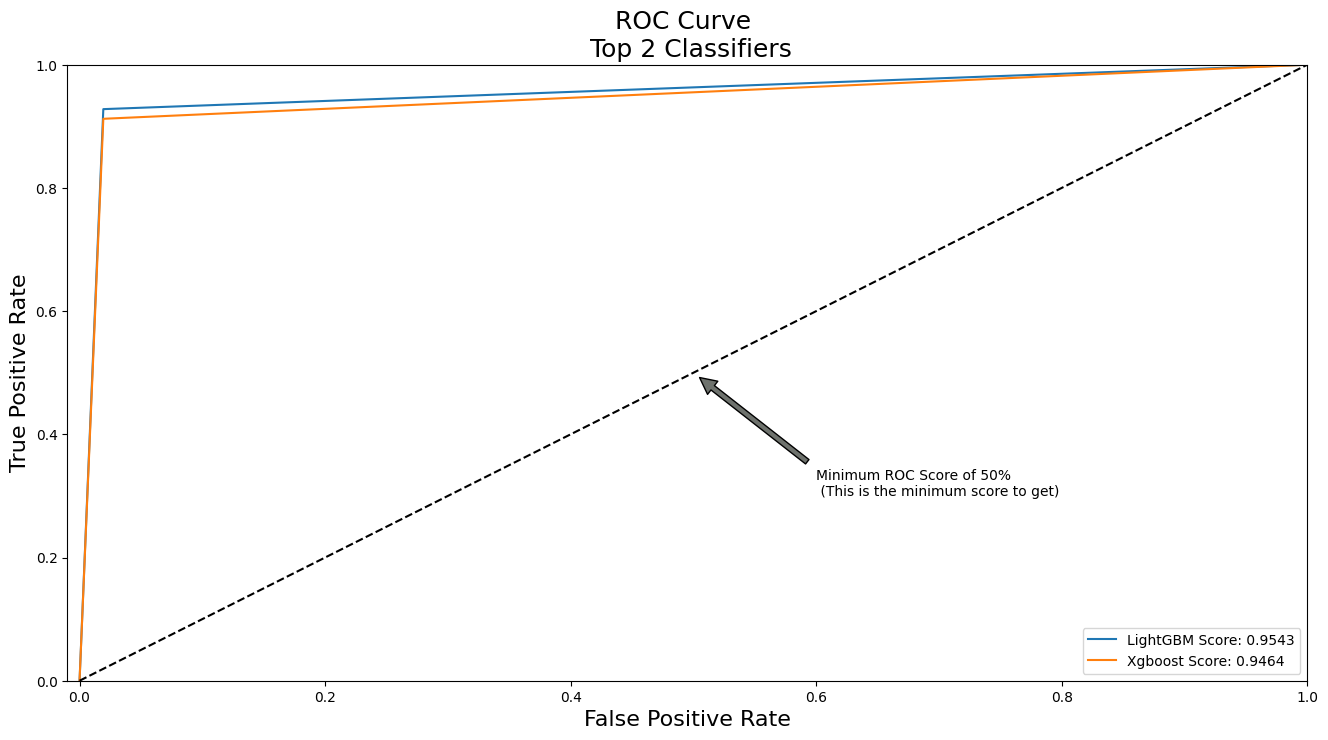

In [ ]:
lgb_fpr, lgb_tpr, lgb_thresold = roc_curve(under_y_train, lgb_param_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(under_y_train, xgb_param_pred)

def graph_roc_curve_multiple(lgb_fpr,lgb_tpr, xgb_fpr,xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(lgb_fpr, lgb_tpr, label='LightGBM Score: {:.4f}'.format(roc_auc_score(under_y_train, lgb_param_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='Xgboost Score: {:.4f}'.format(roc_auc_score(under_y_train, xgb_param_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(lgb_fpr, lgb_tpr, xgb_fpr, xgb_tpr)
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred_xgb = xgb_param.predict(under_x_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(under_y_train, y_pred_xgb)))
print('Precision Score: {:.2f}'.format(precision_score(under_y_train, y_pred_xgb)))
print('F1 Score: {:.2f}'.format(f1_score(under_y_train, y_pred_xgb)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(under_y_train, y_pred_xgb)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(xgb_undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(xgb_undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(xgb_undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(xgb_undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.99
Precision Score: 0.54
F1 Score: 0.70
Accuracy Score: 0.57
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.24
Precision Score: 0.00
Recall Score: 0.73
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
y_pred_lgbm = lgbm_param.predict(under_x_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(under_y_train, y_pred_lgbm)))
print('Precision Score: {:.2f}'.format(precision_score(under_y_train, y_pred_lgbm)))
print('F1 Score: {:.2f}'.format(f1_score(under_y_train, y_pred_lgbm)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(under_y_train, y_pred_lgbm)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(lgbm_undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(lgbm_undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(lgbm_undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(lgbm_undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.62
F1 Score: 0.74
Accuracy Score: 0.67
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.34
Precision Score: 0.00
Recall Score: 0.64
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# undersample_y_score_lgb = lgb_param.decision_function(original_Xtest)

In [ ]:
# from sklearn.metrics import average_precision_score
# undersample_average_precision_lgb = average_precision_score(original_ytest, y_pred_lgb)

# print('Average precision-recall score_LightGBM: {0:0.2f}'.format(
#       undersample_average_precision_lgb))

In [ ]:
# from sklearn.metrics import precision_recall_curve
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(12,6))

# precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score_lgb)

# plt.step(recall, precision, color='#004a93', alpha=0.2,
#          where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2,
#                  color='#48a6ff')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('UnderSampling Precision-Recall_LightGBM curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
#           undersample_average_precision_lgb), fontsize=16)

In [ ]:
# undersample_y_score_xgb = xgb_param.decision_function(original_Xtest)

In [ ]:
# from sklearn.metrics import average_precision_score

# undersample_average_precision_xgb = average_precision_score(original_ytest, undersample_y_score_xgb)

# print('Average precision-recall score_Xgboost: {0:0.2f}'.format(
#       undersample_average_precision_xgb))

# 오버샘플링

In [ ]:
# SMOTE는 클래스의 균형을 맞추기 위해 새로운 데이터를 생성
# 클래스 불균형 해결: SMOTE는 소수 클래스의 합성 포인트를 생성하여 소수 클래스와 다수 클래스 간의 균형을 맞춰줌.
# 합성 포인트의 위치: SMOTE는 소수 클래스의 가장 가까운 이웃 사이의 거리를 선택하고, 이 거리 사이에 합성 포인트를 생성함.
# 효과: 랜덤 언더샘플링과 달리 어떤 행도 삭제되지 않기 때문에 더 많은 정보가 유지됌.
# 정확도와 시간 간의 균형: SMOTE는 랜덤 언더샘플링보다 더 정확할 가능성이 높지만, 어떤 행도 삭제되지 않기 때문에 훈련 시간이 더 오래 걸릴 수 있음.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [ ]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
lgbm_accuracy_lst = []
lgbm_precision_lst = []
lgbm_recall_lst = []
lgbm_f1_lst = []
lgbm_auc_lst = []

# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters

lgbm_params = {
    'n_estimators': [50, 100, 150],
}

# # # RandomizedSearchCV 객체 생성
rand_lgbm = RandomizedSearchCV(LGBMClassifier(n_jobs=-1,verbosity=-1, boost_from_average=False,
                            random_state=rs), lgbm_params, n_iter=5)

# 교차 검증 루프
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    # SMOTE와 RandomizedSearchCV를 포함한 파이프라인
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority', random_state=42), rand_lgbm)

    # 훈련 데이터로 모델 학습
    pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])

    # 최적 모델 추출
    lgbm_best_est = rand_lgbm.best_estimator_

    # 테스트 데이터에 대한 예측
    y_test = original_ytrain[test_idx]
    X_test = original_Xtrain[test_idx]
    y_pred = lgbm_best_est.predict(X_test)

    # 확률 기반으로 AUC 계산
    y_prob = lgbm_best_est.predict_proba(X_test)[:, 1]

    lgbm_accuracy_lst.append(pipeline.score(X_test, y_test))
    lgbm_precision_lst.append(precision_score(y_test, y_pred))
    lgbm_recall_lst.append(recall_score(y_test, y_pred))
    lgbm_f1_lst.append(f1_score(y_test, y_pred))
    lgbm_auc_lst.append(roc_auc_score(y_test, y_prob))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(lgbm_accuracy_lst)))
print("precision: {}".format(np.mean(lgbm_precision_lst)))
print("recall: {}".format(np.mean(lgbm_recall_lst)))
print("f1: {}".format(np.mean(lgbm_f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_sea

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9984902348035988
precision: 0.6137582259341748
recall: 0.830379746835443
f1: 0.6884062847670218
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
lgbm_smote_prediction = lgbm_best_est.predict(original_Xtest)
lgbm_over_classification_report = classification_report(original_ytest, lgbm_smote_prediction, target_names=labels)
print(lgbm_over_classification_report)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.80      0.72      0.76        98

    accuracy                           1.00     56961
   macro avg       0.90      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=rs)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
lgbm_params = {'num_leaves': [3, 5, 7],
               'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05, 1],
    'n_estimators': [50,100, 150],
}
grid_lgbm_sm = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5, error_score='raise')
grid_lgbm_sm.fit(Xsm_train, ysm_train)
print(grid_lgbm_sm.best_params_)
lgbm_param_sm = grid_lgbm_sm.best_estimator_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 7}


In [ ]:
# 데이터 크기 확인
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# 점수를 저장할 리스트 초기화
xgb_accuracy_lst = []
xgb_precision_lst = []
xgb_recall_lst = []
xgb_f1_lst = []
xgb_auc_lst = []

# StratifiedShuffleSplit 초기화
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=rs)

# Logistic Regression 파라미터 설정
xgb_params = {
    'n_estimators': [50, 100, 150],
}

# RandomizedSearchCV 객체 생성
rand_xgb = RandomizedSearchCV(XGBClassifier(random_state=rs),
                                   xgb_params, n_iter=3, random_state=rs)

# 교차 검증 루프
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    # SMOTE와 RandomizedSearchCV를 포함한 파이프라인
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority', random_state=rs), rand_xgb)

    # 훈련 데이터로 모델 학습
    pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])

    # 최적 모델 추출
    xgb_best_est = rand_xgb.best_estimator_

    # 테스트 데이터에 대한 예측
    y_test = original_ytrain[test_idx]
    X_test = original_Xtrain[test_idx]
    y_pred = xgb_best_est.predict(X_test)

    # 확률 기반으로 AUC 계산
    y_prob = xgb_best_est.predict_proba(X_test)[:, 1]

    # 성능 평가 지표 계산 및 저장
    xgb_accuracy_lst.append(pipeline.score(X_test, y_test))
    xgb_precision_lst.append(precision_score(y_test, y_pred))
    xgb_recall_lst.append(recall_score(y_test, y_pred))
    xgb_f1_lst.append(f1_score(y_test, y_pred))
    xgb_auc_lst.append(roc_auc_score(y_test, y_prob))

# 결과 출력
print('---' * 15)
print(f"Accuracy: {np.mean(xgb_accuracy_lst):.4f}")
print(f"Precision: {np.mean(xgb_precision_lst):.4f}")
print(f"Recall: {np.mean(xgb_recall_lst):.4f}")
print(f"F1 Score: {np.mean(xgb_f1_lst):.4f}")
print(f"AUC Score: {np.mean(xgb_auc_lst):.4f}")
print('---' * 15)


Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_sea

---------------------------------------------
Accuracy: 0.9995
Precision: 0.8394
Recall: 0.8582
F1 Score: 0.8482
AUC Score: 0.9682
---------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
xgb_smote_prediction = xgb_best_est.predict(original_Xtest)
xgb_over_classification_report = classification_report(original_ytest, xgb_smote_prediction, target_names=labels)
print(xgb_over_classification_report)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.84      0.76      0.80        98

    accuracy                           1.00     56961
   macro avg       0.92      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=rs)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
xgb_params = {'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05, 1],
    'n_estimators': [50,100, 150],
}
grid_xgb_sm = GridSearchCV(XGBClassifier(), xgb_params, cv=5, error_score='raise')
grid_xgb_sm.fit(Xsm_train, ysm_train)
print(grid_xgb_sm.best_params_)
xgb_param_sm = grid_xgb_sm.best_estimator_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 150}


In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=rs)
plot_learning_curve(grid_lgbm_sm, grid_xgb_sm, Xsm_train, ysm_train, (0.87, 1.01), cv=cv, n_jobs=4)

# 언더 오버 비교

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_lgb_over = lgbm_best_est.predict(x_train)
y_pred_xgb_over = xgb_best_est.predict(x_train)

y_pred_lgb_under = lgbm_undersample_model.predict(x_train)
y_pred_xgb_under = xgb_undersample_model.predict(x_train)


lgb_over_cf = confusion_matrix(y_train, y_pred_lgb_over)
lgb_under_cf = confusion_matrix(y_train, y_pred_lgb_under)

xgb_under_cf = confusion_matrix(y_train, y_pred_xgb_under)
xgb_over_cf = confusion_matrix(y_train, y_pred_xgb_over)

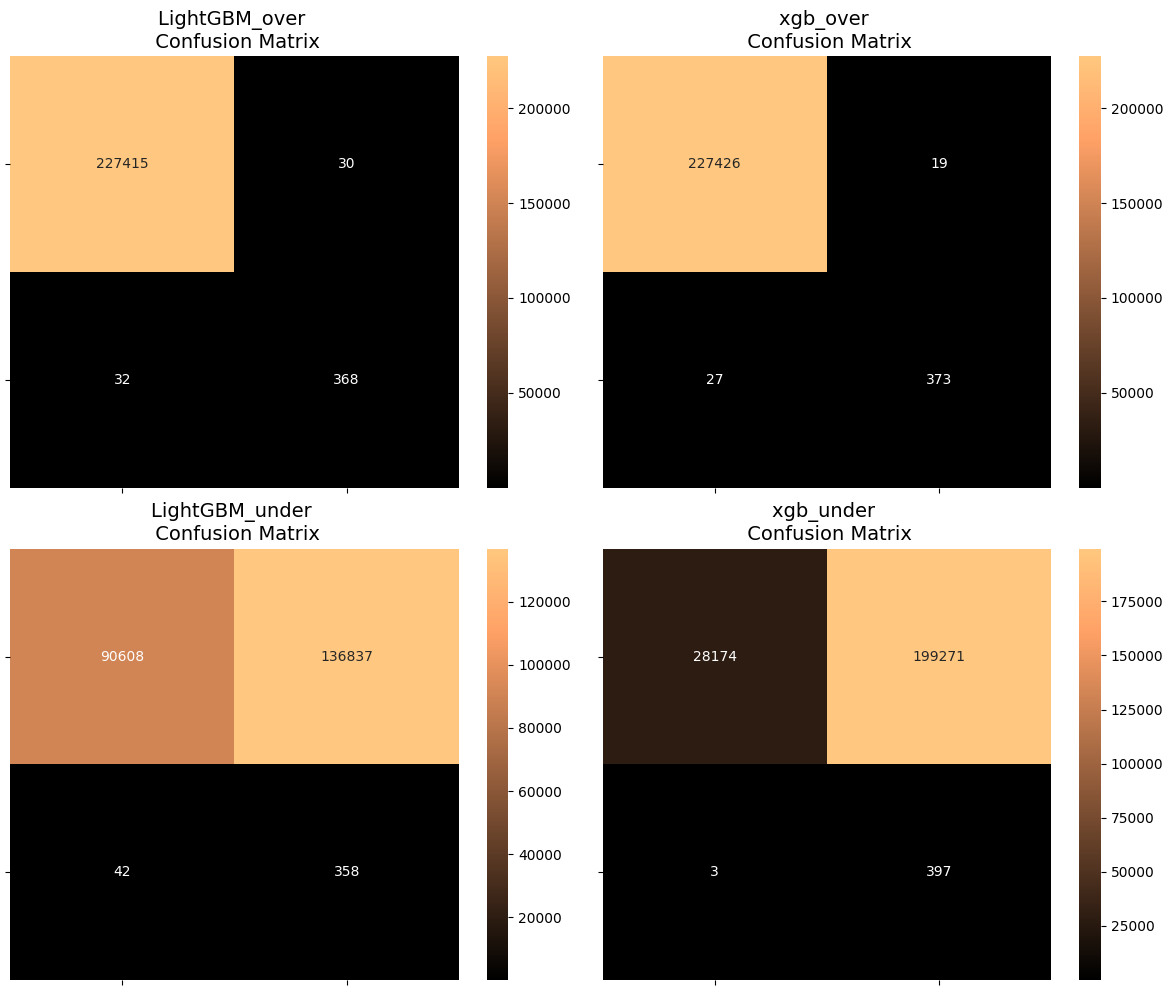

In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(12,10))

sns.heatmap(lgb_over_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper,fmt="d")
ax[0, 0].set_title("LightGBM_over \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(lgb_under_cf, ax=ax[1,0], annot=True, cmap=plt.cm.copper,fmt="d")
ax[1,0].set_title("LightGBM_under \n Confusion Matrix", fontsize=14)
ax[1,0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1,0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgb_over_cf, ax=ax[0,1], annot=True, cmap=plt.cm.copper,fmt="d")
ax[0, 1].set_title("xgb_over \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgb_under_cf, ax=ax[1,1], annot=True, cmap=plt.cm.copper,fmt="d")
ax[1,1].set_title("xgb_under \n Confusion Matrix", fontsize=14)
ax[1,1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1,1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('LightGBM_over:')
print(classification_report(y_train, y_pred_lgb_over))
print('-'*60)

print('LightGBM_under:')
print(classification_report(y_train, y_pred_xgb_under))
print('-'*60)

print('XGboost_over:')
print(classification_report(y_train, y_pred_xgb_over))
print('-'*60)

print('XGboost_under:')
print(classification_report(y_train, y_pred_xgb_under))

LightGBM_over:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227445
         1.0       0.92      0.92      0.92       400

    accuracy                           1.00    227845
   macro avg       0.96      0.96      0.96    227845
weighted avg       1.00      1.00      1.00    227845

------------------------------------------------------------
LightGBM_under:
              precision    recall  f1-score   support

         0.0       1.00      0.12      0.22    227445
         1.0       0.00      0.99      0.00       400

    accuracy                           0.13    227845
   macro avg       0.50      0.56      0.11    227845
weighted avg       1.00      0.13      0.22    227845

------------------------------------------------------------
XGboost_over:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227445
         1.0       0.95      0.93      0.94       400

    accuracy   

# 모델 성능 저장

In [ ]:
# 모델별 성능 저장

model_eval = pd.DataFrame({
    'model' : [''],
    'accuracy' : [0],
    'precision' : [0],
    'recall' : [0],
    'f1_score' : [0],
    'roc_auc' : [0]
})

def add_model_eval(model, accuracy, precision, recall, f1_score, roc_auc):

    model_eval['model'] = model
    model_eval['accuracy'] = f'{accuracy: .2f}'
    model_eval['precision'] =  f'{precision: .2f}'
    model_eval['recall'] = f'{recall: .2f}'
    model_eval['f1_score'] = f'{f1_score: .2f}',
    model_eval['roc_auc'] = f'{roc_auc: .2f}'
    return model_eval

def view_models_eval(df_results):
    df_results = pd.concat([df_results, model_eval], axis=0)
    df_results = df_results.sort_values(by=['recall'], ascending=False).reset_index(drop=True)  # recall을 기준으로 내림차순 정렬
    return df_results

In [ ]:
# Create dataframe
df_metrics_table = pd.DataFrame()

In [ ]:
from sklearn import metrics

lgbm_over_acc = metrics.accuracy_score(y_train, y_pred_lgb_over)
lgbm_over_precision = metrics.precision_score(y_train, y_pred_lgb_over)
lgbm_over_recall = metrics.recall_score(y_train, y_pred_lgb_over)
lgbm_over = metrics.f1_score(y_train, y_pred_lgb_over)
lgbm_over = metrics.roc_auc_score(y_train, y_pred_lgb_over)
add_model_eval('LightGBM_over', lgbm_over_acc, lgbm_over_precision, lgbm_over_recall, lgbm_over, lgbm_over)
df_metrics_table = view_models_eval(df_metrics_table)

xgb_under_acc = metrics.accuracy_score(y_train, y_pred_xgb_under)
xgb_under_precision = metrics.precision_score(y_train, y_pred_xgb_under)
xgb_under_recall = metrics.recall_score(y_train, y_pred_xgb_under)
xgb_under = metrics.f1_score(y_train, y_pred_xgb_under)
xgb_under = metrics.roc_auc_score(y_train, y_pred_xgb_under)
add_model_eval('XGboost_under', xgb_under_acc, xgb_under_precision, xgb_under_recall, xgb_under, xgb_under)
df_metrics_table = view_models_eval(df_metrics_table)

xgb_over_acc = metrics.accuracy_score(y_train, y_pred_xgb_over)
xgb_over_precision = metrics.precision_score(y_train, y_pred_xgb_over)
xgb_over_recall = metrics.recall_score(y_train, y_pred_xgb_over)
xgb_over = metrics.f1_score(y_train, y_pred_xgb_over)
xgb_over = metrics.roc_auc_score(y_train, y_pred_xgb_over)
add_model_eval('Xgboost_over', xgb_over_acc, xgb_over_precision, xgb_over_recall, xgb_over, xgb_over)
df_metrics_table = view_models_eval(df_metrics_table)

lgbm_under_acc = metrics.accuracy_score(y_train, y_pred_lgb_under)
lgbm_under_precision = metrics.precision_score(y_train, y_pred_lgb_under)
lgbm_under_recall = metrics.recall_score(y_train, y_pred_lgb_under)
lgbm_under = metrics.f1_score(y_train, y_pred_lgb_under)
lgbm_under = metrics.roc_auc_score(y_train, y_pred_lgb_under)
add_model_eval('LightGBM_under', lgbm_under_acc, lgbm_under_precision, lgbm_under_recall, lgbm_under, lgbm_under)
df_metrics_table = view_models_eval(df_metrics_table)

In [ ]:
display(df_metrics_table)

,model,accuracy,precision,recall,f1_score,roc_auc
0,XGboost_under,0.13,0.00,0.99,0.56,0.56
1,Xgboost_over,1.00,0.95,0.93,0.97,0.97
2,LightGBM_over,1.00,0.92,0.92,0.96,0.96
3,LightGBM_under,0.40,0.00,0.90,0.65,0.65


In [ ]:
import pandas as pd

# 주어진 데이터로 데이터프레임 생성
data = {
    "model": ["XGboost_under", "Xgboost_over", "LightGBM_over", "LightGBM_under"],
    "accuracy": [0.13, 1.00, 1.00, 0.40],
    "precision": [0.00, 0.95, 0.92, 0.00],
    "recall": [0.99, 0.93, 0.92, 0.90],
    "f1_score": [0.56, 0.97, 0.96, 0.65],
    "roc_auc": [0.56, 0.97, 0.96, 0.65]
}

df_metrics_table = pd.DataFrame(data)
df_metrics_table


,model,accuracy,precision,recall,f1_score,roc_auc
0,XGboost_under,0.13,0.00,0.99,0.56,0.56
1,Xgboost_over,1.00,0.95,0.93,0.97,0.97
2,LightGBM_over,1.00,0.92,0.92,0.96,0.96
3,LightGBM_under,0.40,0.00,0.90,0.65,0.65


In [ ]:
# # # Move column
# # score = final_df['Score']
# # final_df.drop('Score', axis=1, inplace=True)
# # final_df.insert(1, 'Score', score)

# # # Note how high is accuracy score it can be misleading!
# # final_df

In [ ]:
metrics_table = df_metrics_table.melt(id_vars='model', value_vars=['precision','recall','roc_auc'], value_name='score', var_name='metric').sort_values('score').reset_index(drop=True)
metrics_table["score"] = metrics_table["score"].astype(float)
metrics_table

,model,metric,score
0,XGboost_under,precision,0.00
1,LightGBM_under,precision,0.00
2,XGboost_under,roc_auc,0.56
3,LightGBM_under,roc_auc,0.65
4,LightGBM_under,recall,0.90
5,LightGBM_over,precision,0.92
6,LightGBM_over,recall,0.92
7,Xgboost_over,recall,0.93
8,Xgboost_over,precision,0.95
9,LightGBM_over,roc_auc,0.96


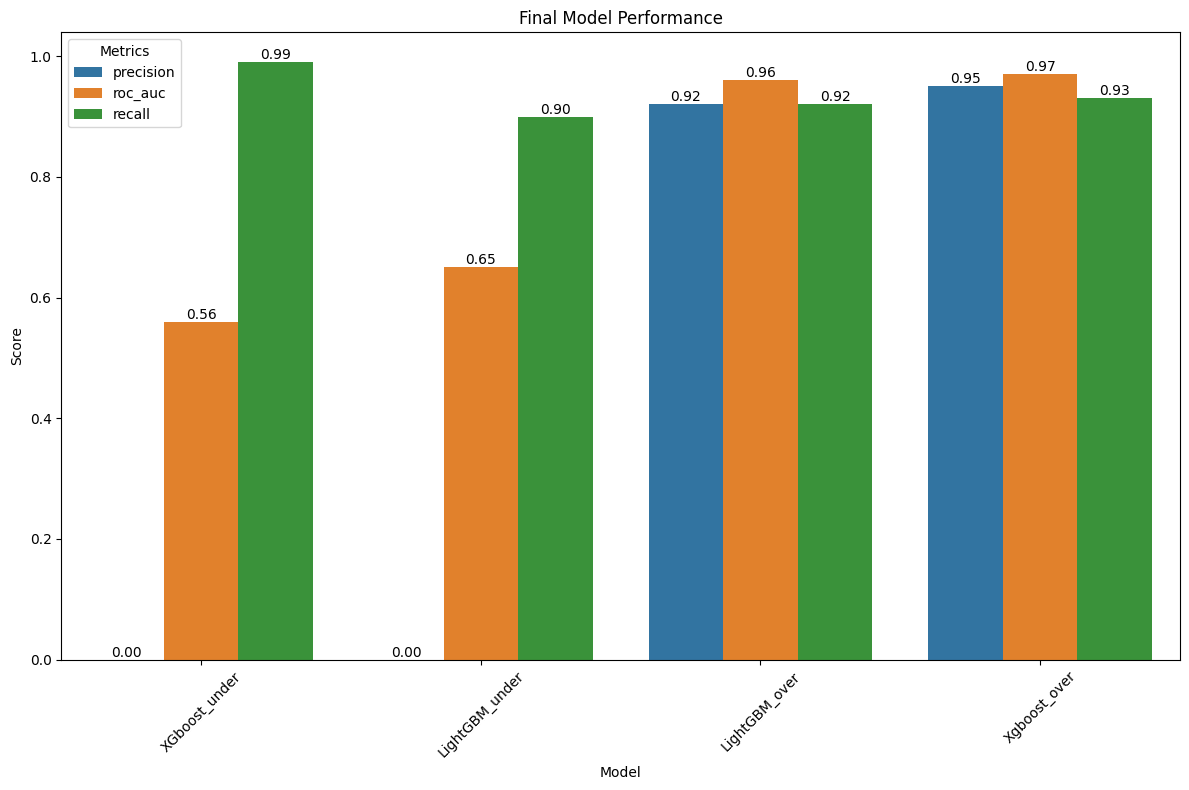

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="model", y="score", hue='metric', data=metrics_table)
plt.title('Final Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
# plt.ylim(0.87, 1.01)
plt.legend(title='Metrics')
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

# for container in ax.containers:
#     for bar, label in zip(container, metrics_table["score"]):
#         height = bar.get_height()
#         plt.text(
#             bar.get_x() + bar.get_width() / 2,
#             height,
#             f"{label:.2f}",
#             ha="center",
#             va="bottom",
#             fontsize=10
#         )

plt.tight_layout()
plt.show()

In [ ]:
# 1. SMOTE 적용: 불균형 데이터셋에 SMOTE를 적용해 레이블 불균형(사기 거래보다 정상 거래가 더 많음)을 해결함.
# 2. 모델 성능 차이: 오버 샘플링된 데이터셋에서 신경망이 무작위 언더샘플링 데이터셋을 사용하는 모델 보다 사기 거래를 올바르게 예측하는 경우가 적었음.
# 4. 정상 거래 오탐지: 언더샘플링 데이터에서는 많은 정상 거래를 사기 거래로 잘못 분류하는 문제가 발생함. 이는 고객 불만과 금융 기관의 단점으로 어이질 수 있음.
# 5. 데이터 셔플링: 데이터 셔플링을 구현했기 때문에 예측과 정확도가 변동될 수 있음.